In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
mean_data = df.loc[:, ['open', 'close']].mean(axis=1)
df['mean_data']=mean_data
# dataset=df[['date','mean_data']]
dataset=df[['mean_data']]

In [3]:
from datetime import datetime
#Removed time from date
# dataset['date']=pd.to_datetime(dataset['date'])
# dataset['date'] = dataset['date'].dt.date
# dataset.set_index('date', inplace=True)
dataset.head()

,mean_data
0,259.370
1,256.430
2,251.890
3,251.385
4,249.175


In [4]:
result = adfuller(dataset['mean_data'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.025251
p-value: 0.743943


In [5]:
dataset2 = dataset.diff().dropna()
# print(dataset2)
result = adfuller(dataset2)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -32.003894819310545
p-value: 0.0


<Figure size 1000x500 with 0 Axes>

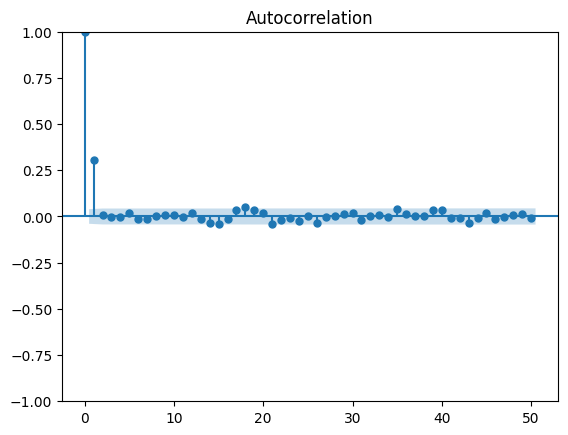

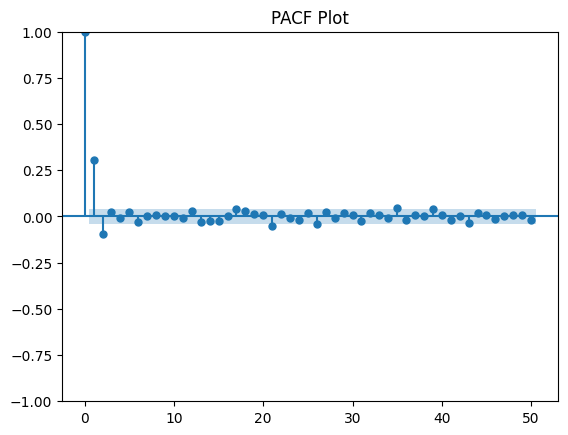

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_acf(dataset2, lags=50)
plot_pacf(dataset2, lags=50)
plt.title('ACF Plot')
plt.title('PACF Plot')
plt.show()


In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [8]:
train=dataset2.iloc[:-5]
test=dataset2.iloc[-5:]

In [9]:
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
forecast = model_fit.forecast(steps=5)
# print("Forecasted Values:", forecast)
# print('-'*40)
forcast=pd.DataFrame(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
# print(test)
# print('-'*40)
# print(forcast)

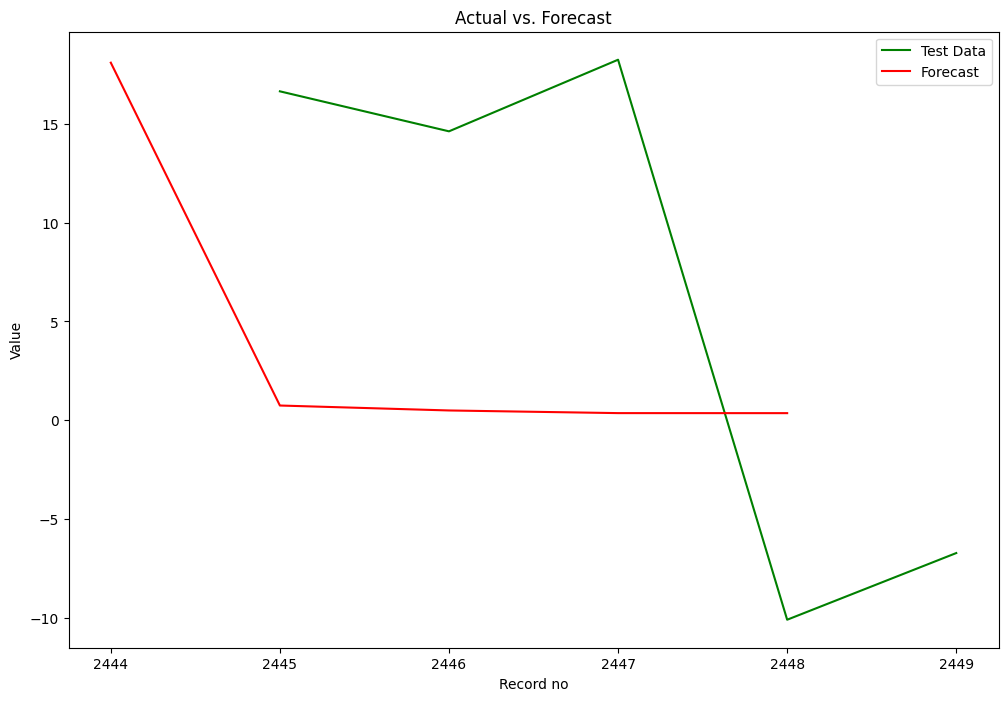

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Second instance

In [13]:
train=dataset2.iloc[:-10]
test=dataset2.iloc[-10:-5]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


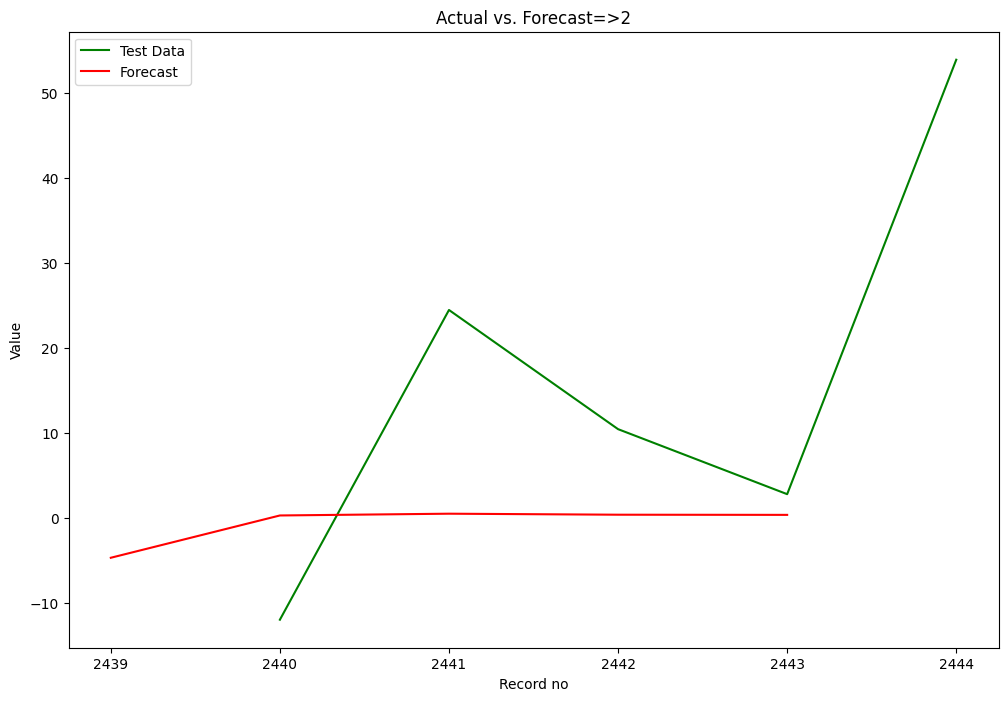

In [14]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast=>2')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Third instance**

In [15]:
train=dataset2.iloc[:-10]
test=dataset2.iloc[-10:-5]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


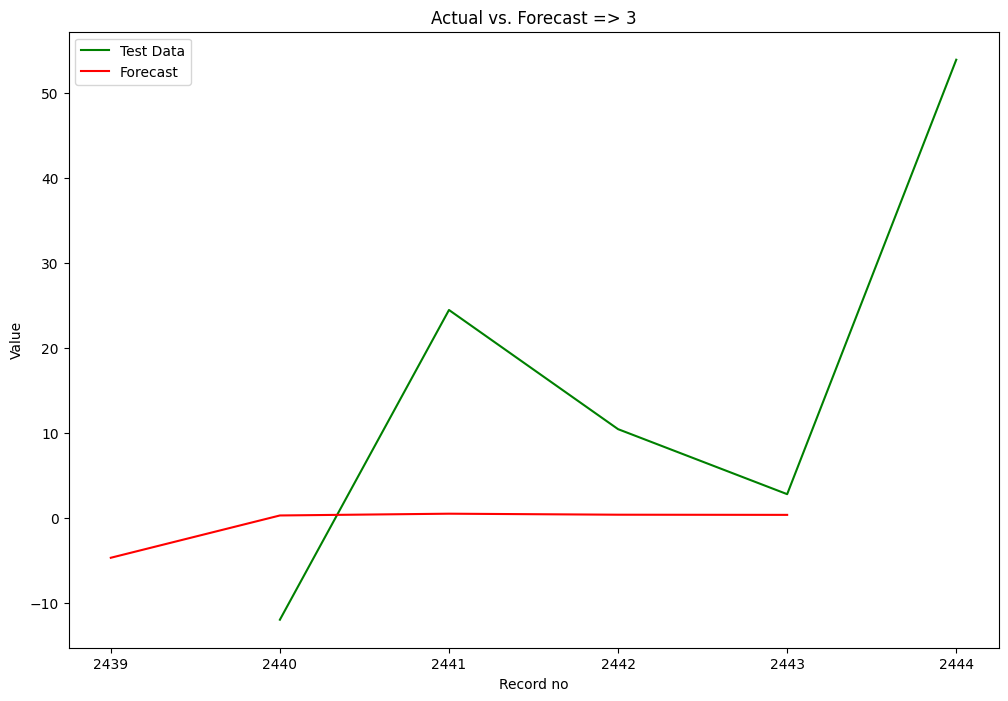

In [16]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 3')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Fourth Instance**

In [17]:
train=dataset2.iloc[:-15]
test=dataset2.iloc[-15:-10]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


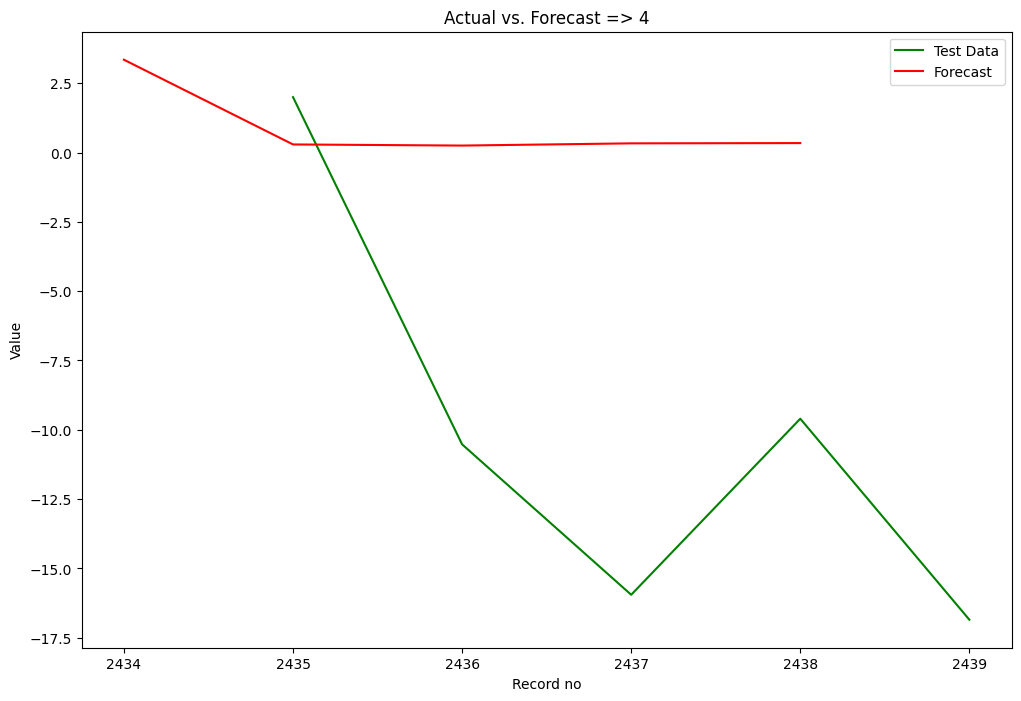

In [18]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 4')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Fifth Instance**

In [19]:
train=dataset2.iloc[:-20]
test=dataset2.iloc[-20:-15]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


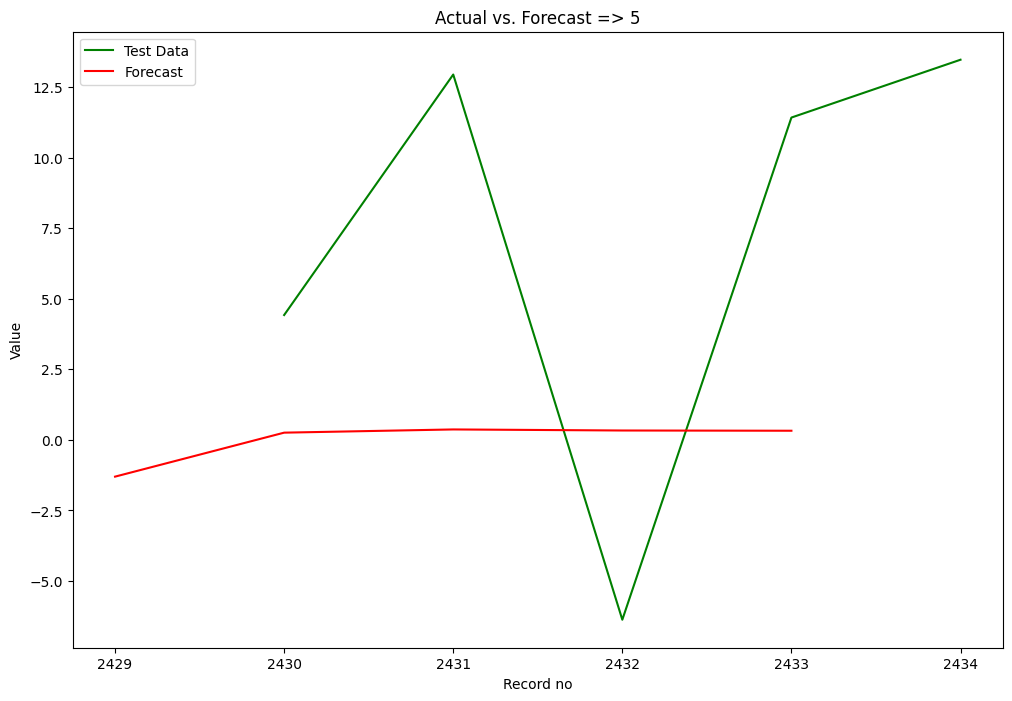

In [20]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 5')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Sixth Instance**

In [21]:
train=dataset2.iloc[:-25]
test=dataset2.iloc[-25:-20]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


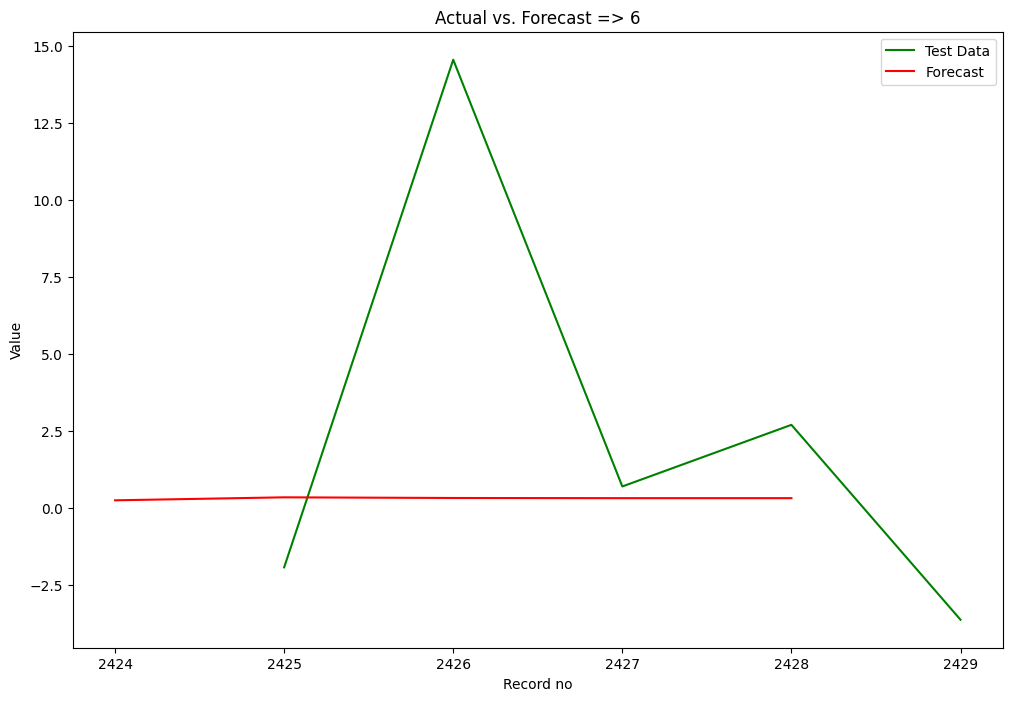

In [22]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 6')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Seventh Instance**

In [23]:
train=dataset2.iloc[:-30]
test=dataset2.iloc[-30:-25]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


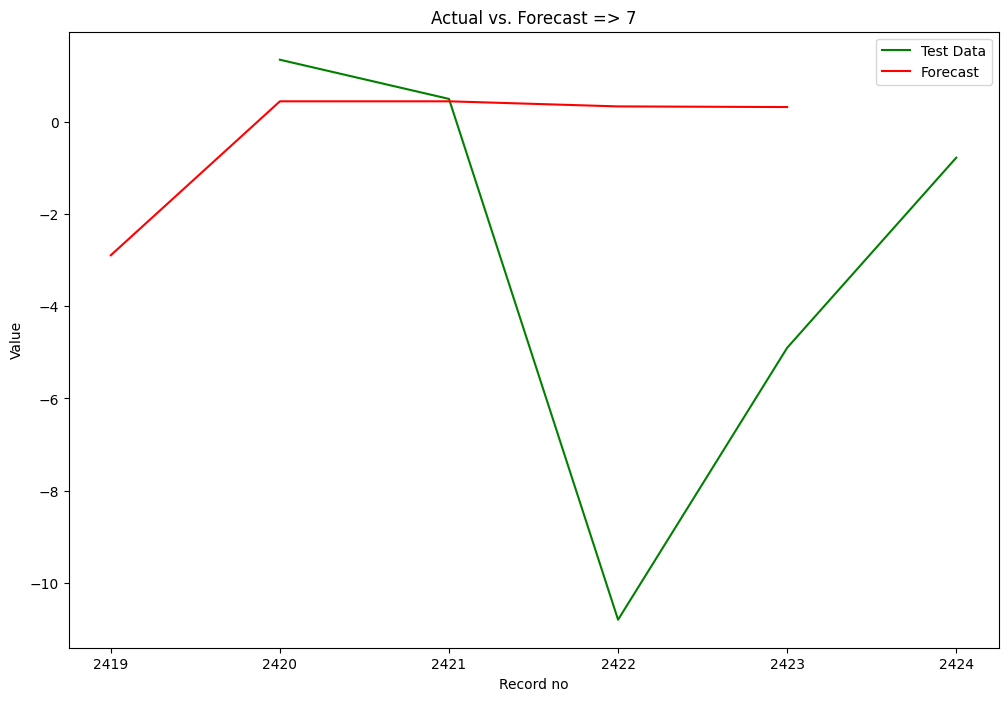

In [24]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 7')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Eigth Instance**

In [25]:
train=dataset2.iloc[:-35]
test=dataset2.iloc[-35:-30]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


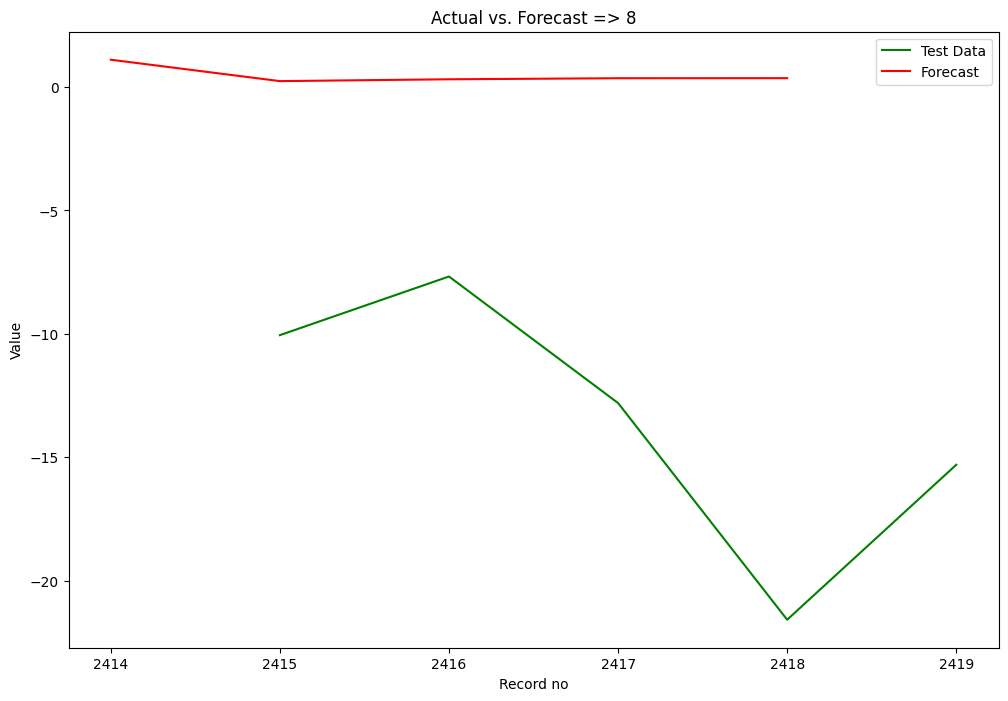

In [26]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 8')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Ninth Instance**

In [27]:
train=dataset2.iloc[:-40]
test=dataset2.iloc[-40:-35]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


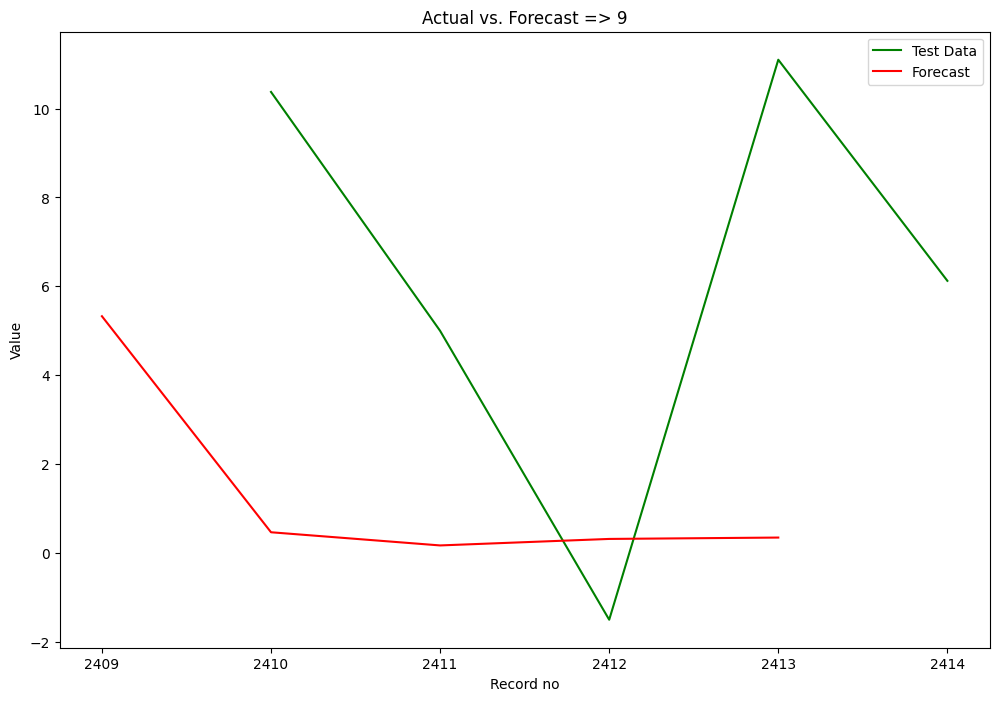

In [28]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 9')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# **Tenth Instance**

In [29]:
train=dataset2.iloc[:-45]
test=dataset2.iloc[-45:-40]
# Load your dataset
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust p, d, and q as per your analysis
model_fit = model.fit()
# Print a summary of the model
# print(model_fit.summary())

# Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# Density plot of residuals
# residuals.plot(kind='kde')
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


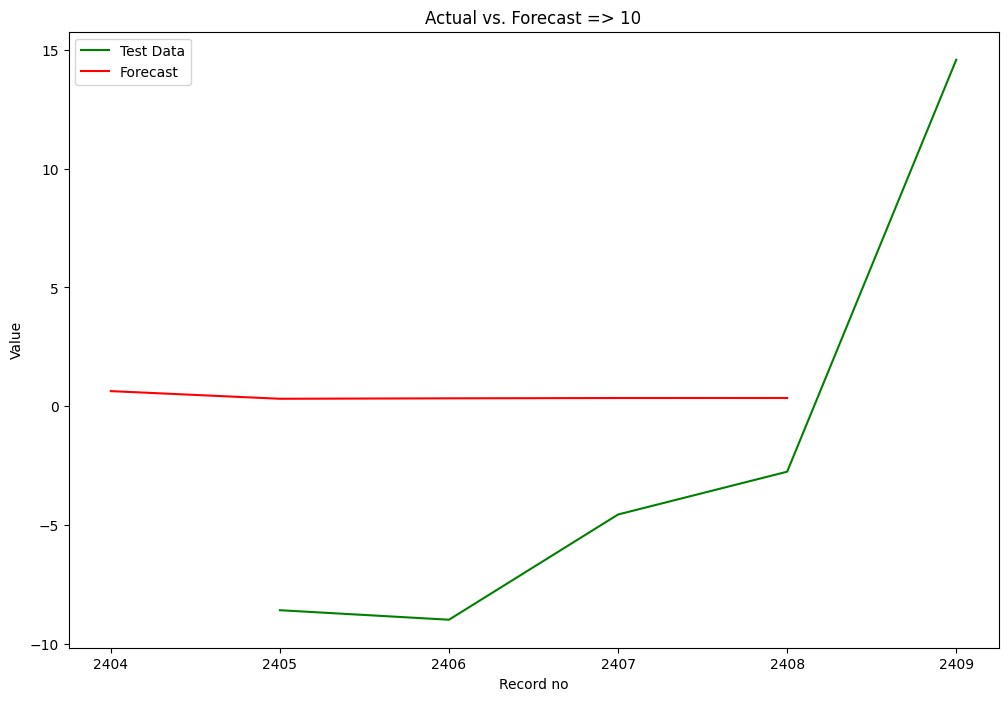

In [30]:
forecast = model_fit.forecast(steps=5)
forcast=pd.DataFrame(forecast)
plt.figure(figsize=(12, 8))
plt.plot(test, label='Test Data', color='green')
plt.plot(forcast, label='Forecast', color='red')
plt.title('Actual vs. Forecast => 10')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()